# Dogs classification

Authors: Michał Sułek, Andrzej Przybylski, Łukasz Kostrzewa, Patrycja Cieplicka
Date: 02.04.2021

In [1]:
import imagegenerator
import analyzer

import tensorflow as tf
from tensorflow.keras import layers
import models
from CAM import *

In [2]:
data_path = 'images/subset'
results_path = 'results'
batch_size = 32

In [3]:
model = models.MobileNetV3((224,224),3)

In [4]:
model.build_easy_model()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 220, 220, 16)      1216      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 55, 55, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 53, 53, 32)        4640      
_________________________________________________________________
dropout (Dropout)            (None, 53, 53, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                1

In [5]:
model.summary(detailed=True)

Model: "MobilenetV3small"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 224, 224, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv (Conv2D)                   (None, 112, 112, 16) 432         rescaling[0][0]                  
__________________________________________________________________________________________________
Conv/BatchNorm (BatchNormalizat (None, 112, 112, 16) 64          Conv[0][0]                       
___________________________________________________________________________________

In [6]:
image_generator = imagegenerator.ImageGenerator(data_path, validation_split=0.2, seed=123, batch_size=batch_size, image_size=(224,224))

In [7]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [8]:
history = model.train_with_generator(image_generator, 4, callbacks= [callback])

Found 465 images belonging to 3 classes.
Found 115 images belonging to 3 classes.
Epoch 1/4
15/15 [==============================] - 10s 648ms/step - loss: 1.1477 - accuracy: 0.3436 - val_loss: 1.0796 - val_accuracy: 0.5217
Epoch 2/4
15/15 [==============================] - 9s 559ms/step - loss: 1.0660 - accuracy: 0.4672 - val_loss: 1.0419 - val_accuracy: 0.3826
Epoch 3/4
15/15 [==============================] - 9s 568ms/step - loss: 1.0035 - accuracy: 0.4821 - val_loss: 0.9510 - val_accuracy: 0.5130
Epoch 4/4
15/15 [==============================] - 9s 584ms/step - loss: 0.9159 - accuracy: 0.5535 - val_loss: 0.9385 - val_accuracy: 0.5130


In [8]:
# history = model.train_with_arrays(image_generator, 3)

## Analyzer

In [9]:
labels = ['Maltese dog', 'Afghan hound',  'Scottish deerhound']
an = analyzer.Analyzer(results_path)
an.analyze_model(model, 'model_2a', image_generator, model_parameters=None, labels=labels, k=2, print_metrics=True)

TypeError: analyze_model() got an unexpected keyword argument 'print_metrics'

Found 143 files belonging to 3 classes.


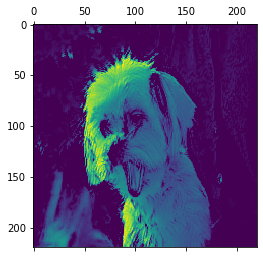

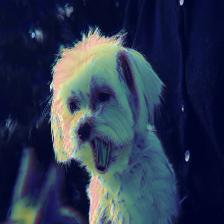

In [18]:
make_heatmap_from_test_img(model, image_generator, "conv2d", 33)